100.0%. Run time:   2.22s. Est. time left: 00:00:00:00
Total run time:   2.38s


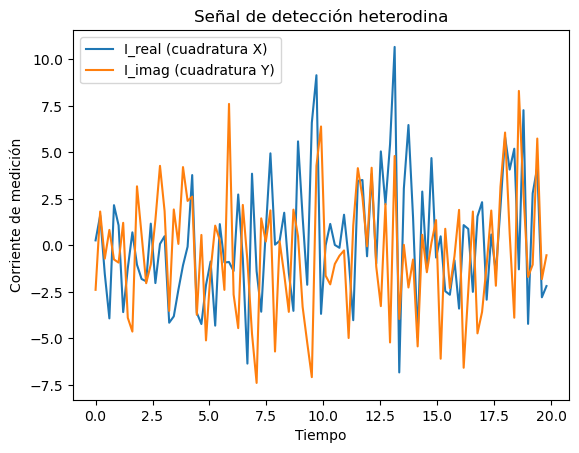

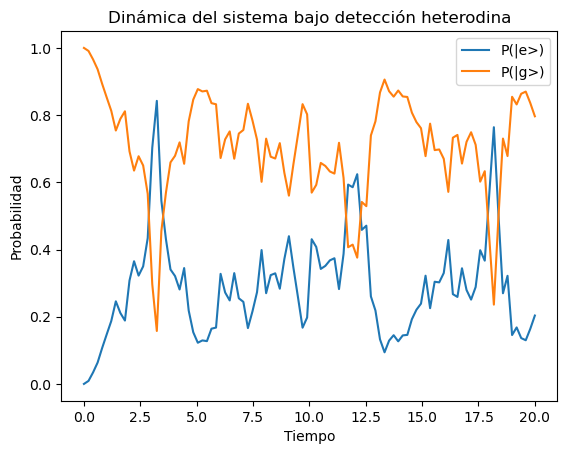

In [31]:
from qutip import basis, smesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()
Aee = Ke * Ke.dag()
Aeg = Ke * Kg.dag()
Age = Kg * Ke.dag()

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # Probabilidades de |e> y |g>

# Parámetros del sistema
Omega = 1  # Frecuencia de Rabi
g = 1  # Tasa de emisión espontánea

# Operador de colapso: emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg]

# Hamiltoniano: interacción entre |e> y |g>
H = 0.5 * Omega * (Aeg + Age)

# Tiempo de simulación
tlist = np.linspace(0, 20, 100)

# Opciones para smesolve
options = {"store_measurement": True, "map": "parallel"}

# Simulación con detección heterodina
result = smesolve(
    H,
    psi0,
    tlist,
    sc_ops=collapse,  # Operadores estocásticos
    heterodyne=True,  # Activar detección heterodina
    e_ops=expect_values,  # Valores esperados
    ntraj=1,  # Número de trayectorias
    options=options,
)

# Reestructuramos las mediciones
measurements = np.squeeze(result.measurement)  # Reducimos dimensiones
I_real = measurements[0]  # Cuadratura real
I_imag = measurements[1]  # Cuadratura imaginaria

# Graficamos las corrientes medidas
plt.figure()
plt.plot(tlist[:-1], I_real, label="I_real (cuadratura X)")
plt.plot(tlist[:-1], I_imag, label="I_imag (cuadratura Y)")
plt.xlabel("Tiempo")
plt.ylabel("Corriente de medición")
plt.legend()
plt.title("Señal de detección heterodina")
plt.show()

# Extraemos las probabilidades de estado
P_e = result.expect[0]
P_g = result.expect[1]

# Graficamos las probabilidades
plt.figure()
plt.plot(tlist, P_e, label="P(|e>)")
plt.plot(tlist, P_g, label="P(|g>)")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad")
plt.legend()
plt.title("Dinámica del sistema bajo detección heterodina")
plt.show()


10.0%. Run time:   9.52s. Est. time left: 00:00:01:25
20.0%. Run time:  14.86s. Est. time left: 00:00:00:59
30.0%. Run time:  20.16s. Est. time left: 00:00:00:47
40.0%. Run time:  25.18s. Est. time left: 00:00:00:37
50.0%. Run time:  30.37s. Est. time left: 00:00:00:30
60.0%. Run time:  35.76s. Est. time left: 00:00:00:23
70.0%. Run time:  42.17s. Est. time left: 00:00:00:18
80.0%. Run time:  47.59s. Est. time left: 00:00:00:11
90.0%. Run time:  53.43s. Est. time left: 00:00:00:05
100.0%. Run time:  58.77s. Est. time left: 00:00:00:00
Total run time:  59.40s


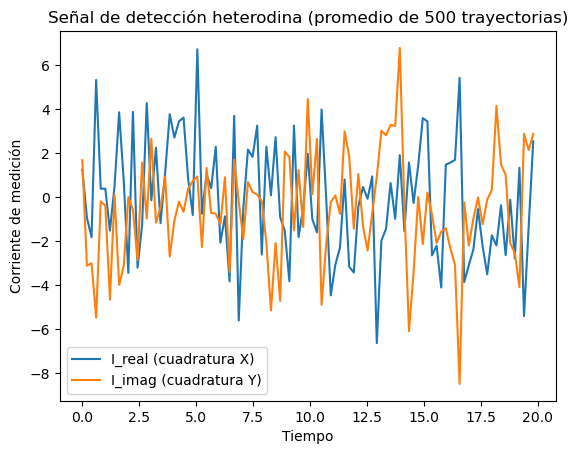

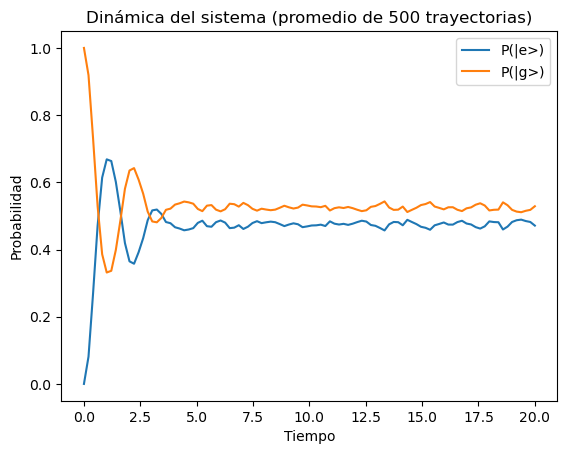

In [30]:
from qutip import basis, smesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()
Aee = Ke * Ke.dag()
Aeg = Ke * Kg.dag()
Age = Kg * Ke.dag()

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # Probabilidades de |e> y |g>

# Parámetros del sistema
Omega = 3  # Frecuencia de Rabi
g = 1  # Tasa de emisión espontánea

# Operador de colapso: emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg]

# Hamiltoniano: interacción entre |e> y |g>
H = 0.5 * Omega * (Aeg + Age)

# Tiempo de simulación
tlist = np.linspace(0, 20, 100)

# Opciones para smesolve
options = {"store_measurement": True, "map": "parallel"}

# Número de trayectorias
ntraj = 500  # Cambia este número para ajustar el promedio

# Simulación con detección heterodina
result = smesolve(
    H,
    psi0,
    tlist,
    sc_ops=collapse,  # Operadores estocásticos
    heterodyne=True,  # Activar detección heterodina
    e_ops=expect_values,  # Valores esperados
    ntraj=ntraj,  # Número de trayectorias
    options=options,
)

# Reestructuramos las mediciones
measurements = np.squeeze(result.measurement)  # Reducimos dimensiones
I_real = np.mean(measurements[0], axis=0)  # Promedio de la cuadratura real
I_imag = np.mean(measurements[1], axis=0)  # Promedio de la cuadratura imaginaria

# Graficamos las corrientes medidas (promediadas)
plt.figure()
plt.plot(tlist[:-1], I_real, label="I_real (cuadratura X)")
plt.plot(tlist[:-1], I_imag, label="I_imag (cuadratura Y)")
plt.xlabel("Tiempo")
plt.ylabel("Corriente de medición")
plt.legend()
plt.title(f"Señal de detección heterodina (promedio de {ntraj} trayectorias)")
plt.show()

# Extraemos las probabilidades de estado (promediadas)
P_e = np.mean(result.expect[0], axis=0).flatten()  # Promedio y aplanado sobre trayectorias
P_g = np.mean(result.expect[1], axis=0).flatten()  # Promedio y aplanado sobre trayectorias


# Graficamos las probabilidades (promediadas)
plt.figure()
plt.plot(tlist, np.array(result.expect[0]), label="P(|e>)")
plt.plot(tlist, np.array(result.expect[1]), label="P(|g>)")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad")
plt.legend()
plt.title(f"Dinámica del sistema (promedio de {ntraj} trayectorias)")
plt.show()



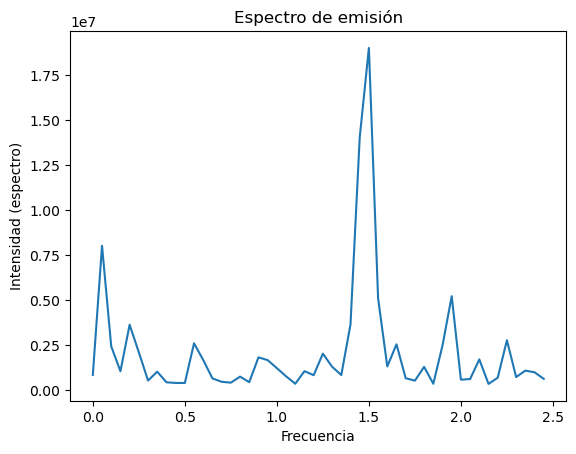

In [32]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Corrientes medidas (usamos las corrientes reales como ejemplo)
# Asegúrate de que `I_real` ya esté promediado sobre trayectorias si es necesario.
signal = I_real

# Tiempo entre puntos
dt = tlist[1] - tlist[0]

# Autocorrelación de la señal
correlation = np.correlate(signal, signal, mode='full')
correlation = correlation[correlation.size // 2:]  # Usamos solo la mitad positiva

# Transformada de Fourier de la autocorrelación
spectrum = np.abs(fft(correlation))**2

# Frecuencias asociadas
freqs = fftfreq(len(correlation), d=dt)

# Nos quedamos con las frecuencias positivas
positive_freqs = freqs[freqs >= 0]
positive_spectrum = spectrum[freqs >= 0]

# Graficamos el espectro
plt.figure()
plt.plot(positive_freqs, positive_spectrum)
plt.xlabel("Frecuencia")
plt.ylabel("Intensidad (espectro)")
plt.title("Espectro de emisión")
plt.show()
